In [34]:
import numpy as np

def F(x, t):
    x2 = x[1]
    x3 = x[2]
    return np.array([ x2, x3, 5-4*x2])

def explicitEulerGen(xn, F, dt):
#    print(xn, dt * F(xn, dt))
    return xn + dt * F(xn, dt)

x0 = np.array([ 0, 1, 0])



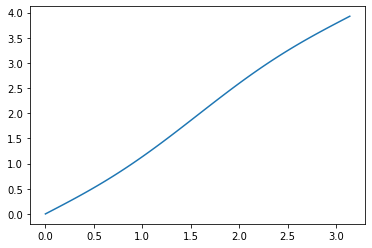

In [35]:
from matplotlib import pyplot as plt

def xSolAnal( t ):
    return -np.sin(2*t)/8+5*t/4

tr = np.linspace(0, np.pi, 101)
x_a = np.array([ xSolAnal(t) for t in tr])

plt.plot(tr, x_a)

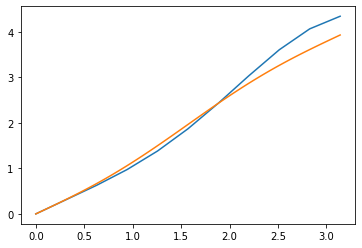

In [49]:
# import copy
tr2 = np.linspace(0, np.pi, 11)
x_ee = np.zeros( len(tr2) )
xv_ee = np.zeros([len(tr2), 3])
#xv_ee = np.array([[0, 0, 0]]  len(tr))
xv_ee[0] = x0
# xv_ee
for i in range(len(tr2)-1):
    dt = tr2[i+1]-tr2[i]
    xn = xv_ee[i]
    xnext = explicitEulerGen(xn, F, dt)
#    print(i, xnext)
#    for j in range(len(xnext)):
#        xv_ee[i+1][j] = xnext[j]
    xv_ee[i+1] = np.array([ x_ for x_ in xnext ])
#    print(xv_ee)
x_ee = np.array([ x_[0] for x_ in xv_ee ])
plt.plot(tr2, x_ee)
plt.plot(tr, x_a)

In [59]:
# import copy
def trEE( nsteps ):
    return np.linspace(0, np.pi, nsteps + 1)

def solveEE( nsteps ):
    tr2 = np.linspace(0, np.pi, nsteps + 1)
    x_ee = np.zeros( len(tr2) )
    xv_ee = np.zeros([len(tr2), 3])
    #xv_ee = np.array([[0, 0, 0]]  len(tr))
    xv_ee[0] = x0
    # xv_ee
    for i in range(len(tr2)-1):
        dt = tr2[i+1]-tr2[i]
        xn = xv_ee[i]
        xnext = explicitEulerGen(xn, F, dt)
#    print(i, xnext)
#    for j in range(len(xnext)):
#        xv_ee[i+1][j] = xnext[j]
        xv_ee[i+1] = np.array([ x_ for x_ in xnext ])
#    print(xv_ee)
    x_ee = np.array([ x_[0] for x_ in xv_ee ])
    return x_ee
#plt.plot(tr2, x_ee)
#plt.plot(tr, x_a)

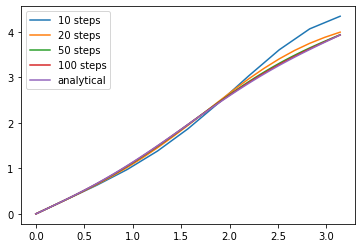

In [66]:
plt.plot(trEE(10), solveEE( 10 ), label="10 steps")
plt.plot(trEE(20), solveEE( 20 ), label="20 steps")
plt.plot(trEE(50), solveEE( 50 ), label="50 steps")
plt.plot(trEE(100), solveEE( 100 ), label="100 steps")
plt.plot(tr, x_a, label="analytical")
plt.legend(loc=2)

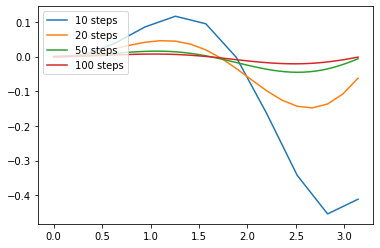

In [70]:
def xaE( nsteps ):
    trl = trEE(nsteps)
    return np.array([ xSolAnal(t) for t in trl ])

plt.plot(trEE(10), xaE(10) - solveEE( 10 ), label="10 steps")
plt.plot(trEE(20), xaE(20) - solveEE( 20 ), label="20 steps")
plt.plot(trEE(50), xaE(50) - solveEE( 50 ), label="50 steps")
plt.plot(trEE(100), xaE(100) - solveEE( 100 ), label="100 steps")
# plt.plot(tr, x_a, label="analytical")
plt.legend(loc=2)



In [71]:
hexps = range(1, 10)
dts = []
errs = []
for hexp in hexps:
    nsteps = 10**hexp
    err = np.linalg.norm(xaE(nsteps) - solveEE(nsteps))
    dts.append( np.pi / nsteps )
    errs.append( err )
    

KeyboardInterrupt: 

In [72]:
dts

[0.3141592653589793,
 0.031415926535897934,
 0.0031415926535897933,
 0.0003141592653589793,
 3.141592653589793e-05,
 3.1415926535897933e-06]

In [73]:
errs

[0.7423023094337262,
 0.10734500694095565,
 0.03149912385584576,
 0.009887959538050922,
 0.003124554371481301,
 0.0009879984320309992]

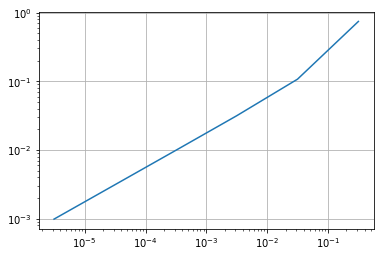

In [75]:
plt.loglog(dts, errs)
plt.grid()